In [ ]:
#CELDA 1: Explorar la estructura del dataset

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Ver la estructura de carpetas del dataset
dataset_path = '/kaggle/input/tree-counting-image-dataset'

print("📁 Estructura del dataset:\n")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Mostrar solo los primeros 5 archivos
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... y {len(files)-5} archivos más')

In [6]:
#CELDA 2: Instalar Ultralytics (YOLOv8)

# Instalar la librería de Ultralytics que contiene YOLOv8
!pip install ultralytics -q

# Verificar la instalación
import ultralytics
from ultralytics import YOLO

print(f"✅ Ultralytics versión: {ultralytics.__version__}")
print("✅ YOLOv8 instalado correctamente")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 65.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#CELDA 3: Analizar el formato de las anotaciones

# Buscar archivos de anotaciones
import json
import glob

# Buscar diferentes tipos de archivos de anotación
annotation_files = []
for ext in ['*.json', '*.xml', '*.txt', '*.csv']:
    annotation_files.extend(glob.glob(f'{dataset_path}/**/{ext}', recursive=True))

print(f"📝 Archivos de anotación encontrados: {len(annotation_files)}\n")

# Mostrar algunos ejemplos
for i, file in enumerate(annotation_files[:3]):
    print(f"{i+1}. {file}")

# Si hay archivos JSON, ver su contenido
if any(f.endswith('.json') for f in annotation_files):
    json_file = [f for f in annotation_files if f.endswith('.json')][0]
    print(f"\n📄 Contenido de ejemplo de: {os.path.basename(json_file)}")
    with open(json_file, 'r') as f:
        data = json.load(f)
        print(json.dumps(data, indent=2)[:500])  # Primeros 500 caracteres

In [ ]:
#CELDA 4: Visualizar algunas imágenes del dataset

# Buscar imágenes
image_files = []
for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.PNG']:
    image_files.extend(glob.glob(f'{dataset_path}/**/{ext}', recursive=True))

print(f"🖼️ Total de imágenes encontradas: {len(image_files)}\n")

# Visualizar algunas imágenes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, img_path in enumerate(image_files[:6]):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].set_title(f"Imagen {i+1}\n{os.path.basename(img_path)}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\n📐 Tamaño de la primera imagen: {img.shape}")

In [ ]:
#CELDA 5: Verificar el contenido de los archivos de anotación

# Ver el contenido de un archivo de anotación para confirmar formato YOLO
label_file = '/kaggle/input/tree-counting-image-dataset/train/labels/fn_261892_4_174161_4_19_jpg.rf.8a59107bc6566dab40ca805a491abf41.txt'

print("📄 Contenido de un archivo de anotación (formato YOLO):\n")
with open(label_file, 'r') as f:
    content = f.read()
    print(content)
    
print("\n💡 Formato YOLO: <class> <x_center> <y_center> <width> <height>")
print("   Todos los valores están normalizados entre 0 y 1")

# Contar cuántas anotaciones hay por conjunto
train_labels = len(glob.glob('/kaggle/input/tree-counting-image-dataset/train/labels/*.txt'))
valid_labels = len(glob.glob('/kaggle/input/tree-counting-image-dataset/valid/labels/*.txt'))
test_labels = len(glob.glob('/kaggle/input/tree-counting-image-dataset/test/labels/*.txt'))

print(f"\n📊 Estadísticas del dataset:")
print(f"   🔵 Train: {train_labels} archivos de anotaciones")
print(f"   🟢 Valid: {valid_labels} archivos de anotaciones")
print(f"   🟡 Test: {test_labels} archivos de anotaciones")

In [ ]:
#CELDA 6: Verificar el archivo data.yaml existente

# Leer el archivo data.yaml que viene con el dataset
yaml_path = '/kaggle/input/tree-counting-image-dataset/data.yaml'

print("📄 Contenido del archivo data.yaml:\n")
with open(yaml_path, 'r') as f:
    yaml_content = f.read()
    print(yaml_content)

In [ ]:
#CELDA 8: Cargar modelo YOLOv8

# Cargar YOLOv8 
# Opciones: yolov8n.pt (nano), yolov8s.pt (small), yolov8m.pt (medium)
# Para este dataset pequeño, nano o small son suficientes

model = YOLO('yolov8n.pt')

print("✅ Modelo YOLOv8 Nano cargado")
print(f"📦 Parámetros del modelo: {sum(p.numel() for p in model.model.parameters()):,}")

In [ ]:
#CELDA 9: Entrenar el modelo

# Entrenar el modelo
results = model.train(
    data= '/kaggle/input/tree-counting-image-dataset/data.yaml',  # Usar el YAML que creamos o el original
    epochs=100,               # Número de épocas (puedes ajustar 50-150)
    imgsz=640,                # Tamaño ya es 640x640 perfecto
    batch=16,                 # Ajustar según tu GPU (8, 16, 32)
    patience=20,              # Early stopping
    save=True,                
    device=0,                 # GPU
    workers=2,                
    project='tree_detection',
    name='yolov8_trees_run1',
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',
    lr0=0.01,                 # Learning rate
    lrf=0.01,                 # Final learning rate
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,                  # Box loss gain
    cls=0.5,                  # Class loss gain
    dfl=1.5,                  # DFL loss gain
    cos_lr=True,              # Cosine learning rate
    close_mosaic=10,          # Disable mosaic last N epochs
    amp=True,                 # Automatic Mixed Precision
    plots=True,
    verbose=True
)

print("\n🎉 ¡Entrenamiento completado!")
print(f"📁 Resultados guardados en: /kaggle/working/tree_detection/yolov8_trees_run1")

In [ ]:
#CELDA 10: Visualizar resultados del entrenamiento

from IPython.display import Image, display

# Ruta a los resultados
results_path = '/kaggle/working/tree_detection/yolov8_trees_run1'

print("📈 RESULTADOS DEL ENTRENAMIENTO\n")
print("="*60)

# Gráficos disponibles
plots = {
    'results.png': '📊 Curvas de Entrenamiento',
    'confusion_matrix.png': '🔍 Matriz de Confusión',
    'confusion_matrix_normalized.png': '🔍 Matriz de Confusión (Normalizada)',
    'F1_curve.png': '📈 Curva F1-Confidence',
    'P_curve.png': '📈 Curva Precision-Confidence',
    'R_curve.png': '📈 Curva Recall-Confidence',
    'PR_curve.png': '📈 Curva Precision-Recall',
    'val_batch0_labels.jpg': '🏷️ Etiquetas Reales (Batch Validación)',
    'val_batch0_pred.jpg': '🎯 Predicciones (Batch Validación)'
}

for plot_file, description in plots.items():
    plot_path = f'{results_path}/{plot_file}'
    if os.path.exists(plot_path):
        print(f"\n{description}")
        print("-"*60)
        display(Image(filename=plot_path, width=900))

In [ ]:
#CELDA 11: Ver métricas finales

# Cargar el mejor modelo
best_model = YOLO(f'{results_path}/weights/best.pt')

# Validar en el conjunto de validación
metrics = best_model.val(data='/kaggle/input/tree-counting-image-dataset/data.yaml', split='val')

print("="*60)
print("📊 MÉTRICAS FINALES DEL MODELO")
print("="*60)
print(f"\n🎯 mAP50 (IoU=0.5):        {metrics.box.map50:.4f}")
print(f"🎯 mAP50-95 (IoU=0.5:0.95): {metrics.box.map:.4f}")
print(f"✅ Precisión:               {metrics.box.mp:.4f}")
print(f"✅ Recall:                  {metrics.box.mr:.4f}")
print(f"⚡ F1-Score:                {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr):.4f}")

print("\n💡 Interpretación:")
print("   • mAP50 > 0.5  = Bueno")
print("   • mAP50 > 0.7  = Muy bueno")
print("   • mAP50 > 0.9  = Excelente")

In [ ]:
#CELDA 12: Predicciones en imágenes de validación

import random

# Obtener imágenes de validación
valid_images = glob.glob('/kaggle/input/tree-counting-image-dataset/valid/images/*.jpeg')

# Seleccionar 6 imágenes aleatorias
sample_images = random.sample(valid_images, min(6, len(valid_images)))

# Hacer predicciones
results = best_model.predict(
    source=sample_images,
    conf=0.25,          # Confianza mínima 25%
    iou=0.45,           # IoU para NMS
    max_det=300,        # Máximo de detecciones
    save=False,
    verbose=False
)

# Visualizar
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (img_path, result) in enumerate(zip(sample_images, results)):
    img_with_boxes = result.plot()
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    axes[i].set_title(
        f"🌳 {len(result.boxes)} árboles detectados\n{os.path.basename(img_path)[:30]}...",
        fontsize=10
    )
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Estadísticas
detections_per_image = [len(r.boxes) for r in results]
print(f"\n📊 Estadísticas de detección:")
print(f"   • Promedio de árboles por imagen: {np.mean(detections_per_image):.1f}")
print(f"   • Mínimo: {min(detections_per_image)} árboles")
print(f"   • Máximo: {max(detections_per_image)} árboles")

In [ ]:
#CELDA 13: Predicciones en imágenes de test

# Obtener imágenes de test
test_images = glob.glob('/kaggle/input/tree-counting-image-dataset/test/images/*.jpeg')

print(f"🧪 Evaluando en {len(test_images)} imágenes de test...\n")

# Predicciones
test_results = best_model.predict(
    source=test_images,
    conf=0.25,
    iou=0.45,
    save=True,
    project='/kaggle/working/predictions',
    name='test_predictions',
    exist_ok=True
)

# Visualizar algunas predicciones
sample_test = random.sample(list(zip(test_images, test_results)), min(6, len(test_images)))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (img_path, result) in enumerate(sample_test):
    img_with_boxes = result.plot()
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    axes[i].set_title(
        f"🌳 {len(result.boxes)} árboles\n{os.path.basename(img_path)[:30]}...",
        fontsize=10
    )
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Predicciones guardadas en: /kaggle/working/predictions/test_predictions")

In [ ]:
#CELDA 14: Exportar el modelo

# Exportar a diferentes formatos
print("📦 Exportando modelo...\n")

# ONNX (recomendado para producción)
onnx_path = best_model.export(format='onnx', dynamic=False)
print(f"✅ ONNX: {onnx_path}")

# TorchScript (PyTorch)
torchscript_path = best_model.export(format='torchscript')
print(f"✅ TorchScript: {torchscript_path}")

# TensorFlow Lite (para móviles)
# tflite_path = best_model.export(format='tflite')
# print(f"✅ TFLite: {tflite_path}")

print(f"\n📍 Modelo PyTorch original: {results_path}/weights/best.pt")
print(f"📍 Último checkpoint: {results_path}/weights/last.pt")

In [ ]:
#CELDA 15: Análisis detallado del modelo

# Analizar las detecciones en todo el conjunto de validación
all_valid_results = best_model.predict(
    source='/kaggle/input/tree-counting-image-dataset/valid/images',
    conf=0.25,
    save=False,
    verbose=False
)

# Recopilar estadísticas
all_detections = []
all_confidences = []

for result in all_valid_results:
    num_trees = len(result.boxes)
    all_detections.append(num_trees)
    
    if num_trees > 0:
        confidences = result.boxes.conf.cpu().numpy()
        all_confidences.extend(confidences)

# Visualizar estadísticas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de detecciones por imagen
axes[0].hist(all_detections, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Número de árboles detectados', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('📊 Distribución de Árboles por Imagen', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Histograma de confianzas
axes[1].hist(all_confidences, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Confianza', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('📊 Distribución de Confianza de las Detecciones', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axvline(x=0.25, color='red', linestyle='--', label='Umbral (0.25)')
axes[1].legend()

plt.tight_layout()
plt.show()

print("="*60)
print("📊 ESTADÍSTICAS GENERALES")
print("="*60)
print(f"Total de imágenes analizadas: {len(all_detections)}")
print(f"Total de árboles detectados:  {sum(all_detections)}")
print(f"Promedio de árboles/imagen:   {np.mean(all_detections):.2f}")
print(f"Desviación estándar:          {np.std(all_detections):.2f}")
print(f"Confianza promedio:           {np.mean(all_confidences):.3f}")
print(f"Confianza mínima:             {min(all_confidences):.3f}")
print(f"Confianza máxima:             {max(all_confidences):.3f}")

In [ ]:
#CELDA EXTRA A: Preparar archivos para guardar

import shutil
import os

# Crear carpeta para el output
output_dir = '/kaggle/working/model_output'
os.makedirs(output_dir, exist_ok=True)

# Copiar los archivos más importantes
print("📦 Preparando archivos para guardar...\n")

# 1. Copiar pesos del modelo
weights_dir = f'{output_dir}/weights'
os.makedirs(weights_dir, exist_ok=True)

best_model_path = '/kaggle/working/tree_detection/yolov8_trees_run1/weights/best.pt'
last_model_path = '/kaggle/working/tree_detection/yolov8_trees_run1/weights/last.pt'

shutil.copy(best_model_path, f'{weights_dir}/best.pt')
shutil.copy(last_model_path, f'{weights_dir}/last.pt')
print(f"✅ Pesos del modelo copiados")

# 2. Copiar resultados y gráficos
results_dir = f'{output_dir}/results'
os.makedirs(results_dir, exist_ok=True)

files_to_save = [
    'results.png', 
    'results.csv',
    'confusion_matrix.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'val_batch0_pred.jpg'
]

for file in files_to_save:
    src = f'/kaggle/working/tree_detection/yolov8_trees_run1/{file}'
    if os.path.exists(src):
        shutil.copy(src, f'{results_dir}/{file}')
        print(f"✅ {file} copiado")

# 3. Copiar data.yaml
shutil.copy('/kaggle/working/data.yaml', f'{output_dir}/data.yaml')
print(f"✅ data.yaml copiado")

# 4. Guardar métricas en un archivo de texto
with open(f'{output_dir}/metrics.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("MÉTRICAS DEL MODELO - Tree Detection YOLOv8\n")
    f.write("="*60 + "\n\n")
    f.write(f"mAP50:     {metrics.box.map50:.4f}\n")
    f.write(f"mAP50-95:  {metrics.box.map:.4f}\n")
    f.write(f"Precisión: {metrics.box.mp:.4f}\n")
    f.write(f"Recall:    {metrics.box.mr:.4f}\n")
    f.write(f"F1-Score:  {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr):.4f}\n")

print(f"✅ Métricas guardadas")

print(f"\n🎉 Todo listo en: {output_dir}")
print("\n📁 Estructura creada:")
os.system(f'tree {output_dir} -L 2')

In [ ]:
#CELDA EXTRA B: Crear ZIP para descargar

# Crear un archivo ZIP con todo
zip_filename = '/kaggle/working/tree_detection_model.zip'

shutil.make_archive(
    '/kaggle/working/tree_detection_model',
    'zip',
    '/kaggle/working/tree_detection/yolov8_trees_run1'
)

print(f"✅ ZIP creado: {zip_filename}")
print(f"📦 Tamaño: {os.path.getsize(zip_filename) / (1024*1024):.2f} MB")
print("\n💡 Para descargar:")
print("   1. Ve a Output en el panel derecho")
print("   2. Después de 'Save Version', descarga el ZIP")

In [ ]:
#URGENTE

import shutil
import os

# Verificar que el modelo existe
model_path = '/kaggle/working/tree_detection/yolov8_trees_run1/weights/best.pt'

if os.path.exists(model_path):
    print("✅ ¡Modelo encontrado!")
    print(f"📦 Tamaño: {os.path.getsize(model_path) / (1024*1024):.2f} MB")
    
    # Copiar a una ubicación segura
    os.makedirs('/kaggle/working/SAVE_THIS', exist_ok=True)
    shutil.copy(model_path, '/kaggle/working/SAVE_THIS/best.pt')
    
    # Copiar también el último checkpoint
    shutil.copy(
        '/kaggle/working/tree_detection/yolov8_trees_run1/weights/last.pt',
        '/kaggle/working/SAVE_THIS/last.pt'
    )
    
    # Copiar data.yaml
    shutil.copy('/kaggle/working/data.yaml', '/kaggle/working/SAVE_THIS/data.yaml')
    
    # Copiar resultados importantes
    for file in ['results.png', 'confusion_matrix.png', 'results.csv']:
        src = f'/kaggle/working/tree_detection/yolov8_trees_run1/{file}'
        if os.path.exists(src):
            shutil.copy(src, f'/kaggle/working/SAVE_THIS/{file}')
    
    print("\n🎉 ARCHIVOS COPIADOS A /kaggle/working/SAVE_THIS/")
    print("\n📋 Archivos guardados:")
    for f in os.listdir('/kaggle/working/SAVE_THIS'):
        size = os.path.getsize(f'/kaggle/working/SAVE_THIS/{f}') / (1024*1024)
        print(f"   • {f} ({size:.2f} MB)")
    
else:
    print("❌ Modelo no encontrado. ¿Terminó el entrenamiento?")

In [ ]:
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################

In [1]:
######################################## BASE DE DATOS ########################################
# ============================================
# CELDA A: CREAR BASE DE DATOS Y TABLAS
# Ejecutar PRIMERO (solo una vez)
# ============================================

import sqlite3
import os

DB_PATH = '/kaggle/working/tree_detection.db'

print("📊 Creando base de datos SQLite...")

# Conectar a la base de datos (la crea si no existe)
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

# 1. Tabla de ESPECIES
print("   └─ Creando tabla 'species'...")
cursor.execute("""
CREATE TABLE IF NOT EXISTS species (
    species_id INTEGER PRIMARY KEY,
    common_name TEXT NOT NULL,
    scientific_name TEXT NOT NULL,
    average_height_m REAL,
    crown_diameter_m REAL,
    description TEXT
)
""")

# 2. Tabla de IMÁGENES
print("   └─ Creando tabla 'images'...")
cursor.execute("""
CREATE TABLE IF NOT EXISTS images (
    image_id INTEGER PRIMARY KEY AUTOINCREMENT,
    filename TEXT NOT NULL UNIQUE,
    width INTEGER DEFAULT 640,
    height INTEGER DEFAULT 640,
    gps_center_lat REAL NOT NULL,
    gps_center_lon REAL NOT NULL,
    meters_per_pixel REAL DEFAULT 0.78,
    coverage_area_m2 REAL,
    processing_date TEXT,
    total_trees_detected INTEGER DEFAULT 0
)
""")

# 3. Tabla de ÁRBOLES
print("   └─ Creando tabla 'trees'...")
cursor.execute("""
CREATE TABLE IF NOT EXISTS trees (
    tree_id INTEGER PRIMARY KEY AUTOINCREMENT,
    image_id INTEGER NOT NULL,
    species_id INTEGER NOT NULL,
    bbox_x_center REAL NOT NULL,
    bbox_y_center REAL NOT NULL,
    bbox_width REAL NOT NULL,
    bbox_height REAL NOT NULL,
    gps_lat REAL NOT NULL,
    gps_lon REAL NOT NULL,
    detection_confidence REAL NOT NULL,
    estimated_height_m REAL,
    estimated_crown_diameter_m REAL,
    detection_date TEXT,
    FOREIGN KEY (image_id) REFERENCES images(image_id),
    FOREIGN KEY (species_id) REFERENCES species(species_id)
)
""")

# 4. Crear índices para búsquedas rápidas
print("   └─ Creando índices...")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_trees_image ON trees(image_id)")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_trees_species ON trees(species_id)")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_trees_gps ON trees(gps_lat, gps_lon)")

# 5. Crear vista útil
print("   └─ Creando vista 'trees_full_info'...")
cursor.execute("""
CREATE VIEW IF NOT EXISTS trees_full_info AS
SELECT 
    t.tree_id,
    t.gps_lat,
    t.gps_lon,
    t.detection_confidence,
    t.estimated_height_m,
    s.common_name as species_name,
    s.scientific_name,
    i.filename as source_image
FROM trees t
JOIN species s ON t.species_id = s.species_id
JOIN images i ON t.image_id = i.image_id
""")

# Guardar cambios
conn.commit()
print("\n✅ Base de datos creada exitosamente!")

# Verificar que existe
if os.path.exists(DB_PATH):
    size_kb = os.path.getsize(DB_PATH) / 1024
    print(f"📍 Ubicación: {DB_PATH}")
    print(f"💾 Tamaño: {size_kb:.2f} KB")
else:
    print("❌ Error: Base de datos no se creó correctamente")

conn.close()

📊 Creando base de datos SQLite...
   └─ Creando tabla 'species'...
   └─ Creando tabla 'images'...
   └─ Creando tabla 'trees'...
   └─ Creando índices...
   └─ Creando vista 'trees_full_info'...

✅ Base de datos creada exitosamente!
📍 Ubicación: /kaggle/working/tree_detection.db
💾 Tamaño: 36.00 KB


In [2]:
# ============================================
# VERIFICACIÓN: Ver las tablas creadas
# ============================================

import sqlite3

conn = sqlite3.connect('/kaggle/working/tree_detection.db')
cursor = conn.cursor()

# Ver todas las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

print("📋 Tablas creadas:")
for table in tables:
    print(f"   ✅ {table[0]}")

# Ver estructura de tabla 'trees'
print("\n📊 Estructura de tabla 'trees':")
cursor.execute("PRAGMA table_info(trees)")
columns = cursor.fetchall()
for col in columns:
    print(f"   • {col[1]} ({col[2]})")

conn.close()

📋 Tablas creadas:
   ✅ species
   ✅ images
   ✅ sqlite_sequence
   ✅ trees

📊 Estructura de tabla 'trees':
   • tree_id (INTEGER)
   • image_id (INTEGER)
   • species_id (INTEGER)
   • bbox_x_center (REAL)
   • bbox_y_center (REAL)
   • bbox_width (REAL)
   • bbox_height (REAL)
   • gps_lat (REAL)
   • gps_lon (REAL)
   • detection_confidence (REAL)
   • estimated_height_m (REAL)
   • estimated_crown_diameter_m (REAL)
   • detection_date (TEXT)


In [3]:
# ============================================
# VER EL CONTENIDO DE MANERA VISUAL
# ============================================
import sqlite3
import pandas as pd

conn = sqlite3.connect('/kaggle/working/tree_detection.db')

# Ver todas las tablas y cuántos registros tienen
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

print("📊 ESTADO DE LA BASE DE DATOS\n")
for table in tables:
    table_name = table[0]
    df = pd.read_sql_query(f"SELECT COUNT(*) as count FROM {table_name}", conn)
    count = df['count'][0]
    print(f"   {table_name}: {count} registros")

conn.close()

📊 ESTADO DE LA BASE DE DATOS

   species: 0 registros
   images: 0 registros
   sqlite_sequence: 0 registros
   trees: 0 registros


In [4]:
# ============================================
# EXPLORAR: Ver estructura del modelo guardado
# ============================================

import os

# Ruta base del input (ajusta según el nombre exacto)
input_path = '/kaggle/input/tree-crown-detection'

print("📁 Explorando estructura del modelo guardado...\n")

# Ver todo lo que hay
for root, dirs, files in os.walk(input_path):
    level = root.replace(input_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        file_path = os.path.join(root, file)
        size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f'{subindent}{file} ({size_mb:.2f} MB)')


📁 Explorando estructura del modelo guardado...

tree-crown-detection/
  __results__.html (0.43 MB)
  __notebook__.ipynb (15.49 MB)
  __output__.json (0.00 MB)
  custom.css (0.00 MB)
  __results___files/
    __results___8_3.png (0.10 MB)
    __results___8_9.jpg (1.21 MB)
    __results___11_2.png (3.28 MB)
    __results___8_5.png (0.09 MB)
    __results___3_1.png (2.35 MB)
    __results___10_1.png (3.05 MB)
    __results___8_7.jpg (1.14 MB)
    __results___8_1.png (0.27 MB)
    __results___13_0.png (0.04 MB)


In [8]:
from ultralytics import YOLO

# Ruta al modelo (ajusta según el nombre de tu dataset)
MODEL_PATH = '/kaggle/input/tree-detection-model-yolov8/weights/best.pt'

# Cargar modelo
best_model = YOLO(MODEL_PATH)
print("✅ Modelo cargado desde Dataset")

✅ Modelo cargado desde Dataset


In [ ]:
# ============================================
# FIX: Arreglar compatibilidad NumPy + OpenCV
# Ejecutar PRIMERO antes de cualquier predicción
# ============================================

import subprocess
import sys

print("🔧 Arreglando compatibilidad de librerías...\n")

# Downgrade NumPy a versión compatible
print("📦 Instalando NumPy compatible...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.24.3", "-q"])

# Reinstalar OpenCV
print("📦 Reinstalando OpenCV...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "opencv-python==4.8.0.74", "-q"])

print("\n✅ Librerías actualizadas")
print("⚠️  IMPORTANTE: Reinicia el kernel ahora")
print("   (Runtime → Restart Session)")

In [9]:
# ============================================
# SETUP COMPLETO: Modelo + Predicciones (CORREGIDO)
# ============================================

import glob
from ultralytics import YOLO

print("🚀 CONFIGURACIÓN COMPLETA\n" + "="*60 + "\n")

# 1. Cargar modelo
print("📦 Cargando modelo YOLOv8...")
MODEL_PATH = '/kaggle/input/tree-detection-model-yolov8/weights/best.pt'
best_model = YOLO(MODEL_PATH)
print("✅ Modelo cargado\n")

# 2. Cargar imágenes de validación (SOLO LAS RUTAS)
print("📂 Buscando imágenes de validación...")
valid_images = glob.glob('/kaggle/input/tree-counting-image-dataset/valid/images/*.jpeg')
print(f"✅ {len(valid_images)} imágenes encontradas\n")

# Verificar que las rutas existen
import os
valid_images = [img for img in valid_images if os.path.exists(img)]
print(f"✅ {len(valid_images)} imágenes verificadas\n")

# 3. Hacer predicciones (YOLOv8 carga las imágenes automáticamente desde las rutas)
print("🔮 Haciendo predicciones...")
print("   (Esto puede tomar 30-60 segundos, se paciente...)\n")

try:
    # Predecir directamente con las rutas (YOLO las carga internamente)
    results = best_model.predict(
        source=valid_images,
        conf=0.25,
        imgsz=640,
        verbose=True  # Cambiar a True para ver progreso
    )
    
    # 4. Resumen
    total_trees = sum(len(r.boxes) for r in results)
    print(f"\n✅ ¡Predicciones completadas!\n")
    
    print("="*60)
    print("📊 RESUMEN DE PREDICCIONES")
    print("="*60)
    print(f"Imágenes procesadas:      {len(results)}")
    print(f"Árboles detectados:       {total_trees}")
    print(f"Promedio por imagen:      {total_trees/len(results):.1f}")
    
    if total_trees > 0:
        trees_per_image = [len(r.boxes) for r in results]
        print(f"Min árboles en imagen:    {min(trees_per_image)}")
        print(f"Max árboles en imagen:    {max(trees_per_image)}")
    
    print("\n" + "="*60)
    print("✅ VARIABLES LISTAS PARA BASE DE DATOS:")
    print("="*60)
    print("   • best_model ✓")
    print("   • results ✓")
    print("   • valid_images ✓")
    print("\n🎯 Continúa con las celdas de Base de Datos")

except Exception as e:
    print(f"\n❌ Error durante las predicciones:")
    print(f"   {str(e)}")
    print("\n💡 Intentando solución alternativa...")
    
    # Plan B: Predecir imagen por imagen
    results = []
    for img_path in valid_images:
        try:
            result = best_model.predict(source=img_path, conf=0.25, verbose=False)
            results.extend(result)
            print(f"✓ {os.path.basename(img_path)}")
        except Exception as img_error:
            print(f"✗ Error en {os.path.basename(img_path)}: {img_error}")
    
    print(f"\n✅ {len(results)} imágenes procesadas con Plan B")

🚀 CONFIGURACIÓN COMPLETA

📦 Cargando modelo YOLOv8...
✅ Modelo cargado

📂 Buscando imágenes de validación...
✅ 18 imágenes encontradas

✅ 18 imágenes verificadas

🔮 Haciendo predicciones...
   (Esto puede tomar 30-60 segundos, se paciente...)


0: 640x640 98 trees, 195.3ms
1: 640x640 149 trees, 195.3ms
2: 640x640 46 trees, 195.3ms
3: 640x640 94 trees, 195.3ms
4: 640x640 80 trees, 195.3ms
5: 640x640 59 trees, 195.3ms
6: 640x640 147 trees, 195.3ms
7: 640x640 112 trees, 195.3ms
8: 640x640 69 trees, 195.3ms
9: 640x640 142 trees, 195.3ms
10: 640x640 138 trees, 195.3ms
11: 640x640 30 trees, 195.3ms
12: 640x640 99 trees, 195.3ms
13: 640x640 70 trees, 195.3ms
14: 640x640 98 trees, 195.3ms
15: 640x640 154 trees, 195.3ms
16: 640x640 87 trees, 195.3ms
17: 640x640 106 trees, 195.3ms
Speed: 6.3ms preprocess, 195.3ms inference, 19.2ms postprocess per image at shape (1, 3, 640, 640)

✅ ¡Predicciones completadas!

📊 RESUMEN DE PREDICCIONES
Imágenes procesadas:      18
Árboles detectados:       1778
Pr

In [10]:
# ============================================
# CELDA B: POBLAR BASE DE DATOS CON DETECCIONES
# Ejecutar DESPUÉS de tener results y valid_images
# ============================================

import sqlite3
import numpy as np
import random
import os
from datetime import datetime
from math import cos, radians
from sklearn.cluster import DBSCAN

DB_PATH = '/kaggle/working/tree_detection.db'

# Configuración
METERS_PER_PIXEL = 0.78  # Cada pixel = 0.78 metros
BASE_LAT = 9.9351  # San José, Costa Rica
BASE_LON = -84.0854

print("🔄 POBLANDO BASE DE DATOS\n" + "="*60 + "\n")

# ============================================
# 1. POBLAR ESPECIES (si aún no existen)
# ============================================

conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

print("🌳 Registrando especies...")

especies = [
    (1, "Ceiba", "Ceiba pentandra", 50.0, 25.0, "Árbol gigante tropical"),
    (2, "Guanacaste", "Enterolobium cyclocarpum", 35.0, 30.0, "Árbol nacional de Costa Rica"),
    (3, "Almendro", "Dipteryx panamensis", 40.0, 20.0, "Madera dura"),
    (4, "Roble", "Quercus costaricensis", 30.0, 15.0, "Común en zonas altas"),
    (5, "Laurel", "Cordia alliodora", 25.0, 12.0, "Madera de construcción")
]

cursor.executemany("""
INSERT OR IGNORE INTO species 
(species_id, common_name, scientific_name, average_height_m, crown_diameter_m, description)
VALUES (?, ?, ?, ?, ?, ?)
""", especies)

conn.commit()
print(f"✅ {len(especies)} especies registradas\n")

# ============================================
# 2. FUNCIONES AUXILIARES
# ============================================

def assign_gps_to_image(filename, image_index, total_images):
    """Asignar coordenadas GPS a una imagen"""
    grid_size = int(np.ceil(np.sqrt(total_images)))
    row = image_index // grid_size
    col = image_index % grid_size
    
    # Offset de ~1km entre imágenes
    offset_lat = (row - grid_size/2) * 0.009
    offset_lon = (col - grid_size/2) * 0.009
    
    center_lat = BASE_LAT + offset_lat
    center_lon = BASE_LON + offset_lon
    
    return center_lat, center_lon

def pixel_to_gps(pixel_x, pixel_y, image_lat, image_lon):
    """Convertir coordenadas de pixel a GPS"""
    # Offset desde el centro (320, 320)
    offset_x_pixels = pixel_x - 320
    offset_y_pixels = pixel_y - 320
    
    # A metros
    offset_x_meters = offset_x_pixels * METERS_PER_PIXEL
    offset_y_meters = offset_y_pixels * METERS_PER_PIXEL
    
    # A grados GPS
    lat = image_lat - (offset_y_meters / 111320)
    lon = image_lon + (offset_x_meters / (111320 * cos(radians(image_lat))))
    
    return lat, lon

def assign_species_by_clustering(trees_coords, num_species=5):
    """Agrupar árboles y asignar especies por cluster"""
    if len(trees_coords) == 0:
        return []
    
    if len(trees_coords) == 1:
        return [random.randint(1, num_species)]
    
    # Clustering (árboles a <39m son mismo cluster)
    clustering = DBSCAN(eps=50, min_samples=1).fit(trees_coords)
    labels = clustering.labels_
    
    # Especie dominante por cluster
    cluster_species = {}
    for cluster_id in set(labels):
        cluster_species[cluster_id] = random.randint(1, num_species)
    
    # Asignar especies (75% dominante, 25% otras)
    species_assignments = []
    for label in labels:
        dominant = cluster_species[label]
        if random.random() < 0.75:
            species_assignments.append(dominant)
        else:
            other = [s for s in range(1, num_species + 1) if s != dominant]
            species_assignments.append(random.choice(other) if other else dominant)
    
    return species_assignments

# ============================================
# 3. PROCESAR CADA IMAGEN Y SUS ÁRBOLES
# ============================================

print("📊 Procesando detecciones...\n")

total_trees_inserted = 0

for img_idx, (result, img_path) in enumerate(zip(results, valid_images)):
    filename = os.path.basename(img_path)
    
    # Asignar GPS a la imagen
    center_lat, center_lon = assign_gps_to_image(filename, img_idx, len(valid_images))
    coverage_area = 500 * 500  # 500m x 500m
    
    # Insertar imagen
    cursor.execute("""
    INSERT OR IGNORE INTO images 
    (filename, gps_center_lat, gps_center_lon, meters_per_pixel, 
     coverage_area_m2, processing_date, total_trees_detected)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    """, (filename, center_lat, center_lon, METERS_PER_PIXEL, 
          coverage_area, datetime.now().isoformat(), len(result.boxes)))
    
    # Obtener image_id
    cursor.execute("SELECT image_id FROM images WHERE filename = ?", (filename,))
    image_id = cursor.fetchone()[0]
    
    # Procesar árboles detectados
    if len(result.boxes) == 0:
        print(f"   [{img_idx+1:2d}/18] {filename[:40]:40s} → 0 árboles")
        continue
    
    # Obtener bounding boxes (normalizados 0-1)
    boxes = result.boxes.xywhn.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    
    # Convertir a píxeles para clustering
    boxes_pixels = []
    for box in boxes:
        x_center = box[0] * 640
        y_center = box[1] * 640
        boxes_pixels.append([x_center, y_center])
    
    # Asignar especies por clustering
    species_ids = assign_species_by_clustering(boxes_pixels, num_species=5)
    
    # Insertar cada árbol
    for box, conf, species_id in zip(boxes, confidences, species_ids):
        x_norm, y_norm, w_norm, h_norm = box
        
        # Convertir a píxeles para GPS
        x_px = x_norm * 640
        y_px = y_norm * 640
        
        # Calcular GPS del árbol
        tree_lat, tree_lon = pixel_to_gps(x_px, y_px, center_lat, center_lon)
        
        # Estimar altura y diámetro
        crown_diameter = w_norm * 640 * METERS_PER_PIXEL
        estimated_height = crown_diameter * 2
        
        # Insertar árbol
        cursor.execute("""
        INSERT INTO trees 
        (image_id, species_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height,
         gps_lat, gps_lon, detection_confidence, estimated_height_m, 
         estimated_crown_diameter_m, detection_date)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (image_id, species_id, x_norm, y_norm, w_norm, h_norm, 
              tree_lat, tree_lon, float(conf), estimated_height, 
              crown_diameter, datetime.now().isoformat()))
        
        total_trees_inserted += 1
    
    print(f"   [{img_idx+1:2d}/18] {filename[:40]:40s} → {len(result.boxes):3d} árboles")

conn.commit()

# ============================================
# 4. VERIFICAR DATOS INSERTADOS
# ============================================

print("\n" + "="*60)
print("✅ DATOS GUARDADOS EN BASE DE DATOS")
print("="*60)

cursor.execute("SELECT COUNT(*) FROM images")
n_images = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM trees")
n_trees = cursor.fetchone()[0]

cursor.execute("""
SELECT s.common_name, COUNT(t.tree_id) as count
FROM species s 
LEFT JOIN trees t ON s.species_id = t.species_id 
GROUP BY s.species_id
ORDER BY count DESC
""")
species_counts = cursor.fetchall()

print(f"\n📊 Estadísticas:")
print(f"   • Imágenes:              {n_images}")
print(f"   • Árboles:               {n_trees}")
print(f"   • Promedio/imagen:       {n_trees/n_images:.1f}")

print(f"\n🌲 Distribución de especies:")
for name, count in species_counts:
    if count > 0:
        percentage = (count / n_trees * 100)
        bar = "█" * int(percentage / 5)
        print(f"   {name:12s} {count:4d} ({percentage:5.1f}%) {bar}")

# Tamaño de BD
db_size = os.path.getsize(DB_PATH) / 1024
print(f"\n💾 Tamaño de BD: {db_size:.2f} KB")
print(f"📍 Ubicación: {DB_PATH}")

conn.close()

print("\n🎉 ¡BASE DE DATOS LISTA!")
print("🎯 Continúa con CELDA C para hacer queries")

🔄 POBLANDO BASE DE DATOS

🌳 Registrando especies...
✅ 5 especies registradas

📊 Procesando detecciones...

   [ 1/18] kn_261727_4_174546_4_19_jpg.rf.ddaf45e19 →  98 árboles
   [ 2/18] rp_261739_4_174479_4_19_jpg.rf.92008c6f1 → 149 árboles
   [ 3/18] vp_262092_4_174266_4_19_jpg.rf.6efbfb7c6 →  46 árboles
   [ 4/18] kg_261733_4_174522_4_19_jpg.rf.f5a9a0a60 →  94 árboles
   [ 5/18] bp_262122_4_174541_4_19_jpg.rf.fb4b9be19 →  80 árboles
   [ 6/18] hn_262082_4_174234_4_19_jpg.rf.9f348d5c1 →  59 árboles
   [ 7/18] st_261964_4_174517_4_19_jpg.rf.53abeb1a9 → 147 árboles
   [ 8/18] rp_261743_4_174479_4_19_jpg.rf.7af4f0ab4 → 112 árboles
   [ 9/18] sg_262078_4_174318_4_19_jpg.rf.5c4dbecea →  69 árboles
   [10/18] wb_261498_4_174683_4_19_jpg.rf.62ff0aa54 → 142 árboles
   [11/18] ng_261974_4_174541_4_19_jpg.rf.915c30544 → 138 árboles
   [12/18] cd_261941_4_174271_4_19_jpg.rf.f6cdbea4b →  30 árboles
   [13/18] rc_261714_4_174452_4_19_jpg.rf.8fc1040c3 →  99 árboles
   [14/18] hh_261908_4_174207_4_19_

In [11]:
# ============================================
# CELDA C: QUERIES DE EJEMPLO
# Consultar y visualizar datos de la base de datos
# ============================================

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = '/kaggle/working/tree_detection.db'

def execute_query(query, params=None):
    """Ejecutar query y retornar DataFrame"""
    conn = sqlite3.connect(DB_PATH)
    if params:
        df = pd.read_sql_query(query, conn, params=params)
    else:
        df = pd.read_sql_query(query, conn)
    conn.close()
    return df

print("="*70)
print("🔍 EJEMPLOS DE QUERIES SQL")
print("="*70)

# ============================================
# QUERY 1: Catálogo de especies
# ============================================
print("\n📋 QUERY 1: Catálogo de Especies\n")
query1 = """
SELECT 
    species_id as ID,
    common_name AS Especie,
    scientific_name AS 'Nombre Científico',
    average_height_m AS 'Altura (m)',
    crown_diameter_m AS 'Diámetro (m)'
FROM species
ORDER BY species_id
"""
df1 = execute_query(query1)
print(df1.to_string(index=False))

# ============================================
# QUERY 2: Top 10 imágenes con más árboles
# ============================================
print("\n\n🖼️  QUERY 2: Top 10 Imágenes con Más Árboles\n")
query2 = """
SELECT 
    filename AS Archivo,
    ROUND(gps_center_lat, 5) AS Latitud,
    ROUND(gps_center_lon, 5) AS Longitud,
    total_trees_detected AS Árboles
FROM images
ORDER BY total_trees_detected DESC
LIMIT 10
"""
df2 = execute_query(query2)
print(df2.to_string(index=False))

# ============================================
# QUERY 3: Estadísticas por especie
# ============================================
print("\n\n🌲 QUERY 3: Estadísticas por Especie\n")
query3 = """
SELECT 
    s.common_name AS Especie,
    COUNT(t.tree_id) AS Cantidad,
    ROUND(AVG(t.detection_confidence) * 100, 1) AS 'Confianza (%)',
    ROUND(AVG(t.estimated_height_m), 1) AS 'Altura Prom (m)',
    ROUND(MIN(t.estimated_height_m), 1) AS 'Min (m)',
    ROUND(MAX(t.estimated_height_m), 1) AS 'Max (m)'
FROM species s
LEFT JOIN trees t ON s.species_id = t.species_id
GROUP BY s.species_id
ORDER BY Cantidad DESC
"""
df3 = execute_query(query3)
print(df3.to_string(index=False))

# ============================================
# QUERY 4: Árboles con mayor confianza
# ============================================
print("\n\n🎯 QUERY 4: Top 10 Árboles con Mayor Confianza\n")
query4 = """
SELECT 
    tree_id AS ID,
    source_image AS Imagen,
    species_name AS Especie,
    ROUND(gps_lat, 6) AS Latitud,
    ROUND(gps_lon, 6) AS Longitud,
    ROUND(detection_confidence * 100, 1) AS 'Confianza (%)',
    ROUND(estimated_height_m, 1) AS 'Altura (m)'
FROM trees_full_info
ORDER BY detection_confidence DESC
LIMIT 10
"""
df4 = execute_query(query4)
print(df4.to_string(index=False))

# ============================================
# QUERY 5: Buscar árboles por especie
# ============================================
print("\n\n🔎 QUERY 5: Buscar Árboles de 'Ceiba'\n")
query5 = """
SELECT 
    COUNT(*) as total,
    ROUND(AVG(detection_confidence) * 100, 1) as confianza_promedio,
    ROUND(AVG(estimated_height_m), 1) as altura_promedio
FROM trees_full_info
WHERE species_name = 'Ceiba'
"""
df5 = execute_query(query5)
print(df5.to_string(index=False))

# Mostrar algunos ejemplos
query5b = """
SELECT 
    tree_id,
    ROUND(gps_lat, 5) AS lat,
    ROUND(gps_lon, 5) AS lon,
    ROUND(detection_confidence * 100, 1) AS conf
FROM trees_full_info
WHERE species_name = 'Ceiba'
LIMIT 5
"""
df5b = execute_query(query5b)
print("\nEjemplos:")
print(df5b.to_string(index=False))

# ============================================
# QUERY 6: Árboles en área específica (GPS)
# ============================================
print("\n\n📍 QUERY 6: Árboles en Área GPS Específica\n")
query6 = """
SELECT 
    species_name AS Especie,
    COUNT(*) AS Cantidad,
    ROUND(AVG(estimated_height_m), 1) AS 'Altura Prom'
FROM trees_full_info
WHERE gps_lat BETWEEN 9.93 AND 9.94
  AND gps_lon BETWEEN -84.09 AND -84.08
GROUP BY species_name
ORDER BY Cantidad DESC
"""
df6 = execute_query(query6)
print(df6.to_string(index=False))

print("\n" + "="*70)
print("✅ QUERIES COMPLETADAS")
print("="*70)

🔍 EJEMPLOS DE QUERIES SQL

📋 QUERY 1: Catálogo de Especies

 ID    Especie        Nombre Científico  Altura (m)  Diámetro (m)
  1      Ceiba          Ceiba pentandra        50.0          25.0
  2 Guanacaste Enterolobium cyclocarpum        35.0          30.0
  3   Almendro      Dipteryx panamensis        40.0          20.0
  4      Roble    Quercus costaricensis        30.0          15.0
  5     Laurel         Cordia alliodora        25.0          12.0


🖼️  QUERY 2: Top 10 Imágenes con Más Árboles

                                                             Archivo  Latitud  Longitud  Árboles
hh_261904_4_174211_4_19_jpg.rf.ed0184ffbb30ac792381537e32be187e.jpeg   9.9396  -84.1079      154
rp_261739_4_174479_4_19_jpg.rf.92008c6f1b9ba3b81acd78a8618d8fa4.jpeg   9.9126  -84.0989      149
st_261964_4_174517_4_19_jpg.rf.53abeb1a92e18ee683b067af15ac5ce6.jpeg   9.9216  -84.0989      147
wb_261498_4_174683_4_19_jpg.rf.62ff0aa54158e6c9d848ee0a2e161a0d.jpeg   9.9216  -84.0719      142
ng_261974_4

📊 GENERANDO VISUALIZACIONES...



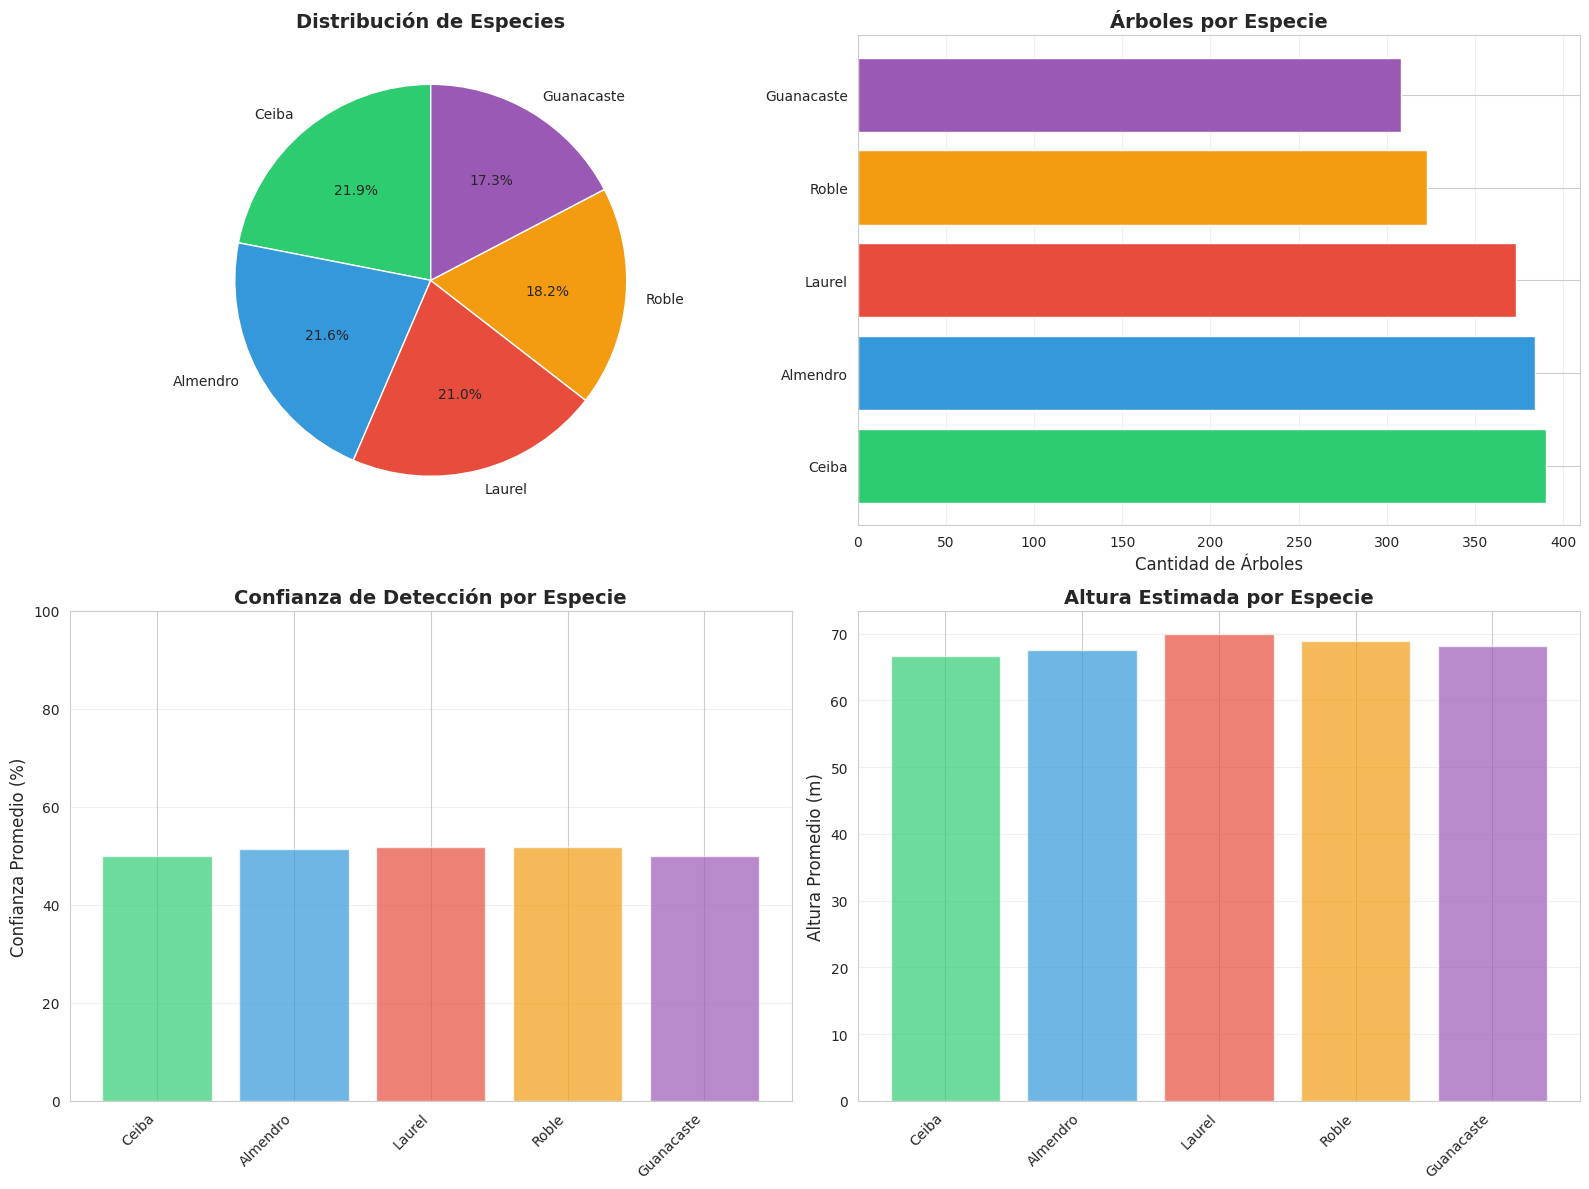

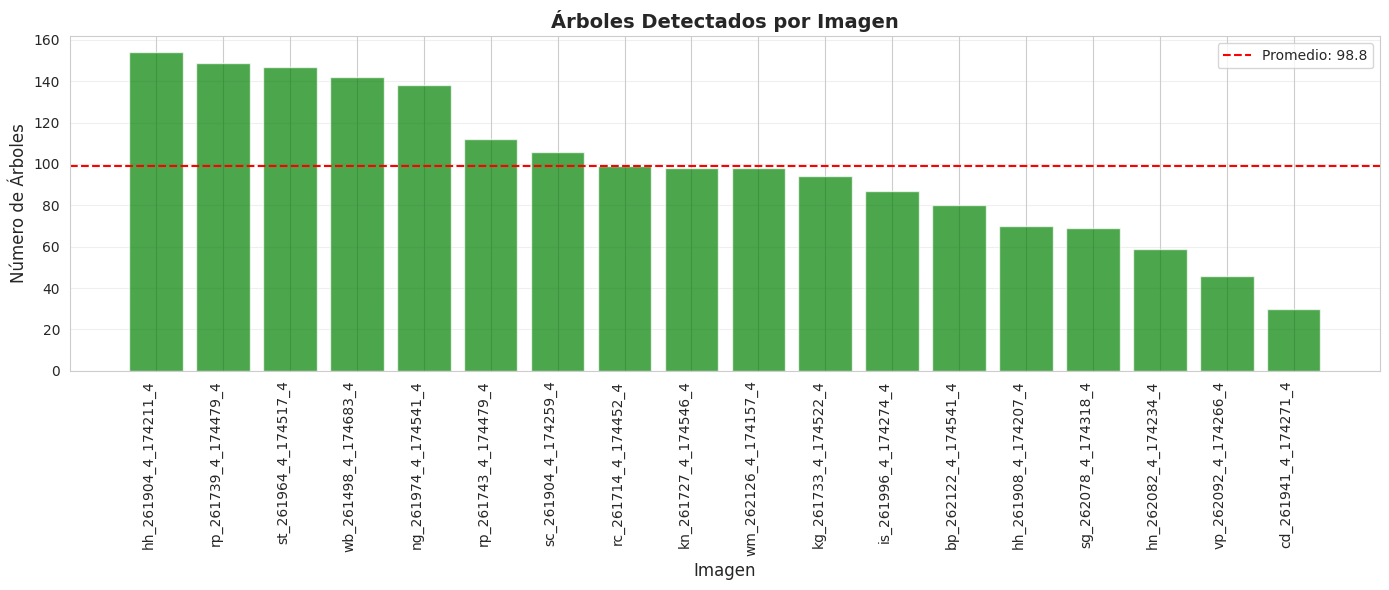

✅ Visualizaciones completadas


In [12]:
# ============================================
# CELDA D: VISUALIZACIONES
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

print("📊 GENERANDO VISUALIZACIONES...\n")

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ============================================
# Gráfico 1: Distribución de especies (Pie + Bar)
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Pie chart
species_data = df3[df3['Cantidad'] > 0]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']

axes[0, 0].pie(species_data['Cantidad'], 
               labels=species_data['Especie'], 
               autopct='%1.1f%%',
               colors=colors,
               startangle=90)
axes[0, 0].set_title('Distribución de Especies', fontsize=14, fontweight='bold')

# Bar chart horizontal
axes[0, 1].barh(species_data['Especie'], 
                species_data['Cantidad'], 
                color=colors)
axes[0, 1].set_xlabel('Cantidad de Árboles', fontsize=12)
axes[0, 1].set_title('Árboles por Especie', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# ============================================
# Gráfico 2: Confianza por especie
# ============================================
axes[1, 0].bar(species_data['Especie'], 
               species_data['Confianza (%)'],
               color=colors,
               alpha=0.7)
axes[1, 0].set_ylabel('Confianza Promedio (%)', fontsize=12)
axes[1, 0].set_title('Confianza de Detección por Especie', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim([0, 100])
axes[1, 0].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# ============================================
# Gráfico 3: Altura promedio por especie
# ============================================
axes[1, 1].bar(species_data['Especie'], 
               species_data['Altura Prom (m)'],
               color=colors,
               alpha=0.7)
axes[1, 1].set_ylabel('Altura Promedio (m)', fontsize=12)
axes[1, 1].set_title('Altura Estimada por Especie', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ============================================
# Gráfico 4: Árboles por imagen
# ============================================
fig, ax = plt.subplots(figsize=(14, 6))

query_trees_per_image = """
SELECT 
    filename,
    total_trees_detected
FROM images
ORDER BY total_trees_detected DESC
"""
df_trees_img = execute_query(query_trees_per_image)

# Acortar nombres de archivos
df_trees_img['filename_short'] = df_trees_img['filename'].str[:20]

ax.bar(range(len(df_trees_img)), 
       df_trees_img['total_trees_detected'],
       color='green',
       alpha=0.7)
ax.set_xlabel('Imagen', fontsize=12)
ax.set_ylabel('Número de Árboles', fontsize=12)
ax.set_title('Árboles Detectados por Imagen', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(df_trees_img)))
ax.set_xticklabels(df_trees_img['filename_short'], rotation=90, ha='right')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=df_trees_img['total_trees_detected'].mean(), 
           color='red', 
           linestyle='--', 
           label=f'Promedio: {df_trees_img["total_trees_detected"].mean():.1f}')
ax.legend()

plt.tight_layout()
plt.show()

print("✅ Visualizaciones completadas")

In [13]:
# ============================================
# CELDA E: EXPORTAR DATOS
# ============================================

import sqlite3
import pandas as pd

DB_PATH = '/kaggle/working/tree_detection.db'

print("💾 EXPORTANDO DATOS...\n")

# 1. Exportar todos los árboles
query_all = "SELECT * FROM trees_full_info"
df_all_trees = execute_query(query_all)
csv_path = '/kaggle/working/all_trees.csv'
df_all_trees.to_csv(csv_path, index=False)
print(f"✅ Todos los árboles → {csv_path}")
print(f"   ({len(df_all_trees)} registros)")

# 2. Exportar resumen por especie
csv_species = '/kaggle/working/species_summary.csv'
df3.to_csv(csv_species, index=False)
print(f"✅ Resumen de especies → {csv_species}")

# 3. Exportar resumen por imagen
csv_images = '/kaggle/working/images_summary.csv'
df2.to_csv(csv_images, index=False)
print(f"✅ Resumen de imágenes → {csv_images}")

# 4. Copiar base de datos para download
import shutil
backup_path = '/kaggle/working/tree_detection_BACKUP.db'
shutil.copy(DB_PATH, backup_path)
print(f"✅ Backup de BD → {backup_path}")

print("\n" + "="*70)
print("📦 ARCHIVOS LISTOS PARA DESCARGAR")
print("="*70)
print("\nHaz 'Quick Save' para guardar todo en Output:")
print("  • tree_detection.db (Base de datos)")
print("  • all_trees.csv (Todos los árboles)")
print("  • species_summary.csv (Resumen de especies)")
print("  • images_summary.csv (Resumen de imágenes)")

💾 EXPORTANDO DATOS...

✅ Todos los árboles → /kaggle/working/all_trees.csv
   (1778 registros)
✅ Resumen de especies → /kaggle/working/species_summary.csv
✅ Resumen de imágenes → /kaggle/working/images_summary.csv
✅ Backup de BD → /kaggle/working/tree_detection_BACKUP.db

📦 ARCHIVOS LISTOS PARA DESCARGAR

Haz 'Quick Save' para guardar todo en Output:
  • tree_detection.db (Base de datos)
  • all_trees.csv (Todos los árboles)
  • species_summary.csv (Resumen de especies)
  • images_summary.csv (Resumen de imágenes)


In [ ]:
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################
######################################## SEPARACION ########################################

In [ ]:
# ============================================
# BACKUP FINAL: Guardar todo lo importante
# Ejecutar al final del entrenamiento
# ============================================

import shutil
import os

backup_dir = '/kaggle/working/IMPORTANT_BACKUP'
os.makedirs(backup_dir, exist_ok=True)

# Lista de archivos importantes
important_files = [
    '/kaggle/working/tree_detection/yolov8_trees_run1/weights/best.pt',
    '/kaggle/working/tree_detection/yolov8_trees_run1/weights/last.pt',
    '/kaggle/working/tree_detection/yolov8_trees_run1/results.png',
    '/kaggle/working/tree_detection/yolov8_trees_run1/confusion_matrix.png',
    '/kaggle/working/data.yaml'
]

print("💾 Guardando archivos importantes...\n")
for file in important_files:
    if os.path.exists(file):
        filename = os.path.basename(file)
        shutil.copy(file, f'{backup_dir}/{filename}')
        print(f"✅ {filename}")

print(f"\n🎉 Backup completado en: {backup_dir}")
print("🔥 AHORA HAZ 'QUICK SAVE' PARA GUARDAR TODO")